<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры (не менее 0.59).

Дополнительно необходимо измерять *AUC-ROC* и сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data['Tenure'].value_counts().sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
Name: Tenure, dtype: int64

<AxesSubplot:>

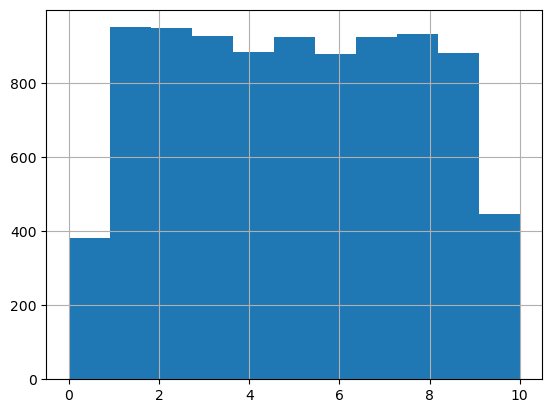

In [7]:
data['Tenure'].hist(bins=11)

Колонки RowNumber (Номер строки), CustomerId (ID клиента) и Surname (Фамилия) можно удалить, так как они не несут никакой смысловой нагрузки для целей модели.

Колонка Tenure содержит пропуски. В данной колонке содержатся данные о том, сколько лет человек является клиентом банка. Отсутствующие данные заполним каким либо числовым значение, которое не встречается в данных, например -1.

Кодирование категориальных колонок и стандартизацию данных проведем позднее, после разделения на выборки.

In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data['Tenure'] = data['Tenure'].fillna(-1).astype(int)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Данные готовы для дальнейшей работы. Выделим признаки и целевой признак.

In [11]:
features = data.drop('Exited', axis=1)
target = data['Exited']

Разобъем данные на обучающую, валидационную и тестовую выборки в пропорциях 60/20/20.

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=123456, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=123456, stratify=target_valid)

In [13]:
features_train.shape

(6000, 10)

In [14]:
features_valid.shape

(2000, 10)

In [15]:
features_test.shape

(2000, 10)

In [16]:
target_train.shape

(6000,)

In [17]:
target_valid.shape

(2000,)

In [18]:
target_test.shape

(2000,)

Данные разбиты на выборки.

Проведем кодирование категориальных признаков, содержащихся в колонках 'Geography' и 'Gender', техникой OneHotEncoding.

In [19]:
def encode_OHE(df, encoder, cats_to_ohe):
    ohe_data = pd.DataFrame(encoder.transform(df[cats_to_ohe]).toarray(), index=df.index)
    ohe_data.columns = list(map(str, ohe_data.columns))
    df = df.join(ohe_data).drop(cats_to_ohe, axis=1)
    return df    

In [20]:
cats_to_OHE = ['Geography', 'Gender']

In [21]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(features_train[cats_to_OHE])

OneHotEncoder(handle_unknown='ignore')

In [22]:
features_train = encode_OHE(features_train, encoder, cats_to_OHE)
features_valid = encode_OHE(features_valid, encoder, cats_to_OHE)
features_test = encode_OHE(features_test, encoder, cats_to_OHE)

Теперь произведем стандартизацию данных в колонках 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' с помощью функции StandardScaler. В остальных колонках содержатся бинарные признаки, их стандартизация не требуется.

In [23]:
scaler = StandardScaler()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric_cols])

features_train[numeric_cols] = scaler.transform(features_train[numeric_cols])
features_valid[numeric_cols] = scaler.transform(features_valid[numeric_cols])
features_test[numeric_cols] = scaler.transform(features_test[numeric_cols])

Посмотрим что получилось в итоге.

In [24]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
6545,-2.249304,-1.134886,-0.759837,-1.230315,0.820790,1,1,0.919822,0.0,0.0,1.0,0.0,1.0
2246,0.687905,0.012445,0.459153,-1.230315,0.820790,1,0,-0.126472,0.0,0.0,1.0,1.0,0.0
1450,-0.191189,-0.752442,-0.455090,0.963221,-0.904162,1,0,-0.319076,0.0,0.0,1.0,0.0,1.0
6358,0.015656,-0.656831,-0.759837,-1.230315,0.820790,1,0,-0.795698,1.0,0.0,0.0,1.0,0.0
4462,-0.160162,-0.656831,1.068648,-1.230315,0.820790,1,1,-1.406267,0.0,0.0,1.0,1.0,0.0


In [25]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6545 to 4520
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6000 non-null   float64
 1   Age              6000 non-null   float64
 2   Tenure           6000 non-null   float64
 3   Balance          6000 non-null   float64
 4   NumOfProducts    6000 non-null   float64
 5   HasCrCard        6000 non-null   int64  
 6   IsActiveMember   6000 non-null   int64  
 7   EstimatedSalary  6000 non-null   float64
 8   0                6000 non-null   float64
 9   1                6000 non-null   float64
 10  2                6000 non-null   float64
 11  3                6000 non-null   float64
 12  4                6000 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 785.3 KB


In [26]:
features_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,-2.652618e-16,1.622776e-16,-1.535068e-16,4.526009e-16,8.733754e-18,0.700000,0.513667,2.278178e-16,0.503333,0.250167,0.246500,0.450000,0.550000
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,0.458296,0.499855,1.000083e+00,0.500031,0.433145,0.431009,0.497535,0.497535
min,-3.107714e+00,-1.995384e+00,-1.674079e+00,-1.230315e+00,-9.041622e-01,0.000000,0.000000,-1.741446e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.876190e-01,-6.568310e-01,-7.598370e-01,-1.230315e+00,-9.041622e-01,0.000000,0.000000,-8.584949e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.599879e-02,-1.787765e-01,1.544054e-01,3.290932e-01,-9.041622e-01,1.000000,1.000000,-1.139565e-02,1.000000,0.000000,0.000000,0.000000,1.000000
75%,6.982475e-01,4.904999e-01,7.639003e-01,8.190684e-01,8.207896e-01,1.000000,1.000000,8.600788e-01,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.063429e+00,4.314936e+00,1.678143e+00,2.598957e+00,4.270693e+00,1.000000,1.000000,1.721076e+00,1.000000,1.000000,1.000000,1.000000,1.000000


На валидационных и тестовых данных картина должна быть такой же, их выводить не будем.

На этапе подготовки данные были загружены и изучены.

Ненужные колонки RowNumber (Номер строки), CustomerId (ID клиента) и Surname (Фамилия) удалены, а пропуски в колонке Tenure заполнены.

Данные были разбиты на три выборки в соотношении 60/20/20.

Произведено кодирование категориальных колонок 'Geography', 'Gender' техникой OneHotEncoding и стандартизация данных в колонках 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' с помощью функции StandardScaler.

## Исследование задачи

Посмотрим на баланс классов.

In [27]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

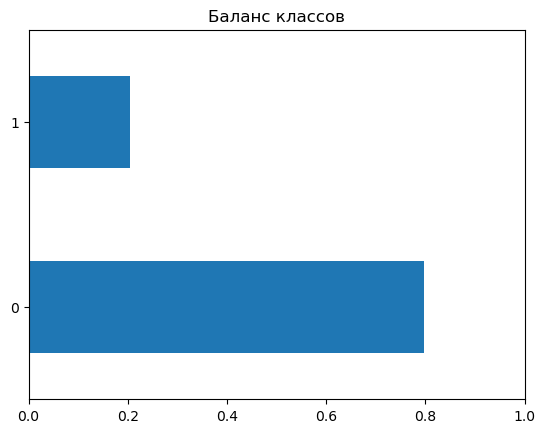

In [28]:
target.value_counts(normalize=True).plot(kind='barh', xlim=(0, 1), title='Баланс классов');

Наблюдается сильный дисбаланс в пользу отрицательного класса.

Протестируем модели в текущих условиях.

Для начала напишем несколько вспомогательных функций.

In [29]:
def count_model_metrics(model, features_train, target_train, features_valid, target_valid):
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions_proba_valid_one = model.predict_proba(features_valid)[:,1]
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, predictions_proba_valid_one)
    return model, f1, roc_auc

def test_log_reg(features_train, target_train, features_valid, target_valid, class_weight=None):
    print ('Тестируем модель логической регрессии:')
    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight=class_weight)
    model, f1, roc_auc = count_model_metrics(
        model, features_train, target_train, features_valid, target_valid
    )
    print (model)
    print(f'F1_score: {f1}')
    print(f'Roc_auc_score: {roc_auc}')
    print()
    
def test_tree(features_train, target_train, features_valid, target_valid, class_weight=None):
    print ('Тестируем модель решающего дерева:')
    f1_max = 0
    f1_save = 0
    roc_auc_max = 0
    roc_auc_save = 0
    best_model_by_f1 = 'not_found'
    best_model_by_roc_auc = 'not_found'
    for depth in range (1, 31, 1):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=class_weight)
        model, f1, roc_auc = count_model_metrics(
            model, features_train, target_train, features_valid, target_valid
        )
        if f1 > f1_max:
            f1_max = f1
            roc_auc_save = roc_auc
            best_model_by_f1 = model
        if roc_auc > roc_auc_max:
            f1_save = f1
            roc_auc_max = roc_auc
            best_model_by_roc_auc = model
    print (f'Лучшая модель по показателю F1-меры: {best_model_by_f1}')
    print (f'F1_score: {f1_max}')
    print (f'Roc_auc_score: {roc_auc_save}')
    print (f'Лучшая модель по показателю roc_auc: {best_model_by_roc_auc}')
    print (f'F1_score: {f1_save}')
    print (f'Roc_auc_score: {roc_auc_max}')
    print()
    
def test_forest(features_train, target_train, features_valid, target_valid, class_weight=None):
    print ('Тестируем модель случайного леса:')
    f1_max = 0
    f1_save = 0
    roc_auc_max = 0
    roc_auc_save = 0
    best_model_by_f1 = 'not_found'
    best_model_by_roc_auc = 'not_found'
    for est in range(20, 150, 10):
        for depth in range (6, 18, 1):
            model = RandomForestClassifier(
                n_estimators=est, max_depth=depth, random_state=12345, class_weight=class_weight
            )
            model, f1, roc_auc = count_model_metrics(
                model, features_train, target_train, features_valid, target_valid
            )
            if f1 > f1_max:
                f1_max = f1
                roc_auc_save = roc_auc
                best_model_by_f1 = model
            if roc_auc > roc_auc_max:
                f1_save = f1
                roc_auc_max = roc_auc
                best_model_by_roc_auc = model
    print (f'Лучшая модель по показателю F1-меры: {best_model_by_f1}')
    print (f'F1_score: {f1_max}')
    print (f'Roc_auc_score: {roc_auc_save}')
    print (f'Лучшая модель по показателю roc_auc: {best_model_by_roc_auc}')
    print (f'F1_score: {f1_save}')
    print (f'Roc_auc_score: {roc_auc_max}')
    print()
    
def test_models(features_train, target_train, features_valid, target_valid, class_weight=None):
    dt = [features_train, target_train, features_valid, target_valid]
    test_log_reg(*dt, class_weight)
    test_tree(*dt, class_weight)
    test_forest(*dt, class_weight)

In [30]:
dt = [features_train, target_train, features_valid, target_valid]

In [31]:
%%time
test_models(*dt)

Тестируем модель логической регрессии:
LogisticRegression(random_state=12345, solver='liblinear')
F1_score: 0.29981718464351004
Roc_auc_score: 0.7720478567936195

Тестируем модель решающего дерева:
Лучшая модель по показателю F1-меры: DecisionTreeClassifier(max_depth=9, random_state=12345)
F1_score: 0.5726744186046512
Roc_auc_score: 0.7970620851976783
Лучшая модель по показателю roc_auc: DecisionTreeClassifier(max_depth=5, random_state=12345)
F1_score: 0.5113043478260869
Roc_auc_score: 0.8401722215281537

Тестируем модель случайного леса:
Лучшая модель по показателю F1-меры: RandomForestClassifier(max_depth=16, n_estimators=60, random_state=12345)
F1_score: 0.5990783410138248
Roc_auc_score: 0.8546790241705496
Лучшая модель по показателю roc_auc: RandomForestClassifier(max_depth=9, n_estimators=110, random_state=12345)
F1_score: 0.5705128205128205
Roc_auc_score: 0.8603873519127756

CPU times: user 53.5 s, sys: 479 ms, total: 53.9 s
Wall time: 53.3 s


Показатели моделей невысокие. Лучшие показатели у моделей случайного леса с глубиной 16 и количеством деревьев 60 (F1-мера: 0.599, roc_auc: 0.855) и глубиной 9 и количеством деревьев 110 (F1-мера: 0.571, roc_auc: 0.860).

По показателю F1-меры модель случайного леса с глубиной 16 и количеством деревьев 60 достигла требуемой по условиям задачи величины F1-меры на валидационных данных.

## Борьба с дисбалансом

Дисбаланс можно устранить техниками upsampling (дублирование объектов меньшего класса) или downsampling (удаление части объектов большего класса).

Можно также использовать встроенный в модели параметр class_weight.

Проверим какая методика даст лучший результат.

Для начала напишем вспомогательные функции, потом используем их чтобы сбалансировать классы и провести тесты.

In [32]:
def divide_classes(features, target):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    return features_zeros, features_ones, target_zeros, target_ones

def upsample(features, target, repeat):
    features_zeros, features_ones, target_zeros, target_ones = (
        divide_classes(features, target)
    )
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros, features_ones, target_zeros, target_ones = (
        divide_classes(features, target)
    )
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle (
        features_downsampled, target_downsampled, random_state=123456)
    
    return features_downsampled, target_downsampled

Сбалансируем классы используя технику upsampling.

In [33]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

In [34]:
features_train_upsampled.shape

(9666, 13)

In [35]:
target_train_upsampled.value_counts(normalize=True)

1    0.50569
0    0.49431
Name: Exited, dtype: float64

Сбалансируем классы используя технику downsampling.

In [36]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

In [37]:
features_train_downsampled.shape

(2416, 13)

In [38]:
target_train_downsampled.value_counts(normalize=True)

1    0.505795
0    0.494205
Name: Exited, dtype: float64

Классы успешно сбалансированы двумя методами.

Проведем тестирование моделей с учетом балансировки классов.

Протестируем модели на данных, сбалансированных техникой upsample.

In [39]:
dt_upsampled = [features_train_upsampled,
                target_train_upsampled,
                features_valid,
                target_valid]

In [40]:
%%time
test_models(*dt_upsampled)

Тестируем модель логической регрессии:
LogisticRegression(random_state=12345, solver='liblinear')
F1_score: 0.4965277777777777
Roc_auc_score: 0.7722159756058061

Тестируем модель решающего дерева:
Лучшая модель по показателю F1-меры: DecisionTreeClassifier(max_depth=7, random_state=12345)
F1_score: 0.5620155038759691
Roc_auc_score: 0.805673161605365
Лучшая модель по показателю roc_auc: DecisionTreeClassifier(max_depth=5, random_state=12345)
F1_score: 0.554089709762533
Roc_auc_score: 0.836069505561031

Тестируем модель случайного леса:
Лучшая модель по показателю F1-меры: RandomForestClassifier(max_depth=12, n_estimators=120, random_state=12345)
F1_score: 0.6385093167701863
Roc_auc_score: 0.861346708804336
Лучшая модель по показателю roc_auc: RandomForestClassifier(max_depth=9, n_estimators=130, random_state=12345)
F1_score: 0.6263736263736264
Roc_auc_score: 0.8620731671579129

CPU times: user 1min 15s, sys: 549 ms, total: 1min 15s
Wall time: 1min 14s


Протестируем модели на данных, сбалансированных техникой downsample.

In [41]:
dt_downsampled = [features_train_downsampled,
                  target_train_downsampled,
                  features_valid,
                  target_valid]

In [42]:
%%time
test_models(*dt_downsampled)

Тестируем модель логической регрессии:
LogisticRegression(random_state=12345, solver='liblinear')
F1_score: 0.48961937716262977
Roc_auc_score: 0.7705070247443129

Тестируем модель решающего дерева:
Лучшая модель по показателю F1-меры: DecisionTreeClassifier(max_depth=7, random_state=12345)
F1_score: 0.5414680648236415
Roc_auc_score: 0.8002093002093003
Лучшая модель по показателю roc_auc: DecisionTreeClassifier(max_depth=5, random_state=12345)
F1_score: 0.53886925795053
Roc_auc_score: 0.8259075716702836

Тестируем модель случайного леса:
Лучшая модель по показателю F1-меры: RandomForestClassifier(max_depth=11, n_estimators=130, random_state=12345)
F1_score: 0.5923076923076923
Roc_auc_score: 0.8566825685469753
Лучшая модель по показателю roc_auc: RandomForestClassifier(max_depth=10, n_estimators=130, random_state=12345)
F1_score: 0.5872093023255814
Roc_auc_score: 0.8585071974902484

CPU times: user 30.3 s, sys: 356 ms, total: 30.6 s
Wall time: 29.5 s


Также протестируем модели на несбалансированных данных, но с использованием встроенного в модели параметра class_weight, придав ему значение 'balanced'.

In [43]:
%%time
test_models(*dt, class_weight='balanced')

Тестируем модель логической регрессии:
LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')
F1_score: 0.5008787346221442
Roc_auc_score: 0.7722421959710095

Тестируем модель решающего дерева:
Лучшая модель по показателю F1-меры: DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=12345)
F1_score: 0.5711442786069652
Roc_auc_score: 0.8165607826624777
Лучшая модель по показателю roc_auc: DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
F1_score: 0.5340050377833753
Roc_auc_score: 0.8358551155161323

Тестируем модель случайного леса:
Лучшая модель по показателю F1-меры: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=140,
                       random_state=12345)
F1_score: 0.6412213740458016
Roc_auc_score: 0.8609626575728271
Лучшая модель по показателю roc_auc: RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=110,
                      

По результатам проведенных тестов можно сделать вывод что все три способа борьбы с дисбалансом классов показывают схожие результаты.

Лучший результат по показателю F1-меры у модели случайного леса при использовании несбалансированных данных и с параметром модели class_weight='balanced'. F1-мера равна 0,647, показатель roc_auc составляет 0.860 при максимальной глубине 9 и количестве дереврьев 140.

Лучший результат по показателю roc_auc у модели случайного леса при использовании также несбалансированных данных и с параметром модели class_weight='balanced'. F1-мера равна 0,635, показатель roc_auc составил 0,866, при максимальной глубине 11 и количестве дереврьев 90.

## Тестирование модели

Посмотрим результаты двух лучших моделей по показателям F1-меры и roc_auc на тестовых данных.

Для начала создадим модели и еще раз посмотрим их результаты на валидационных данных.

In [44]:
model_1 = RandomForestClassifier(n_estimators=140, max_depth=9, class_weight='balanced', random_state=12345)
model_1.fit(features_train, target_train)

model_2 = RandomForestClassifier(n_estimators=90, max_depth=11, class_weight='balanced', random_state=12345)
model_2.fit(features_train, target_train)

for model in [model_1, model_2]:
    print(model)
    predicted_valid = model.predict(features_valid)
    predicted_proba_one_valid = model.predict_proba(features_valid)[:,1]
    print(f'F1_score: {f1_score(target_valid, predicted_valid)}')
    print(f'Roc_auc_score: {roc_auc_score(target_valid, predicted_proba_one_valid)}')
    print()

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=140,
                       random_state=12345)
F1_score: 0.6301703163017032
Roc_auc_score: 0.8587277570328418

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=90,
                       random_state=12345)
F1_score: 0.6209677419354839
Roc_auc_score: 0.8637235077913045



Теперь посмотрим на результаты моделей на тестовых данных

In [45]:
for model in [model_1, model_2]:
    print(model)
    predicted_test = model.predict(features_test)
    predicted_proba_one_test = model.predict_proba(features_test)[:,1]
    print(f'F1_score: {f1_score(target_test, predicted_test)}')
    print(f'Roc_auc_score: {roc_auc_score(target_test, predicted_proba_one_test)}')
    print()

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=140,
                       random_state=12345)
F1_score: 0.6241457858769932
Roc_auc_score: 0.8590901812986501

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=90,
                       random_state=12345)
F1_score: 0.6167741935483871
Roc_auc_score: 0.8548317568233323



Результаты схожи с результатами на валидационных данных, лишь немного им уступая. Необходимый уровень F1-меры (не менее 0,59) достигнут.

В качестве быстрой меры для улучшения метрик попробуем обучить модели используя обучающие и валидационные данные. Проверим улучшит ли это качество модели на тестовых данных.

In [46]:
for model in [model_1, model_2]:
    print(model)
    model.fit(pd.concat([features_train, features_valid]),
             pd.concat([target_train, target_valid]))
    predicted_test = model.predict(features_test)
    predicted_proba_one_test = model.predict_proba(features_test)[:,1]
    print(f'F1_score: {f1_score(target_test, predicted_test)}')
    print(f'Roc_auc_score: {roc_auc_score(target_test, predicted_proba_one_test)}')
    print()

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=140,
                       random_state=12345)
F1_score: 0.6245847176079734
Roc_auc_score: 0.8610423440733077

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=90,
                       random_state=12345)
F1_score: 0.6278787878787878
Roc_auc_score: 0.8588684845797616



"Дообучение" помогло немного улучшить модели.

В качестве двух лучших моделей можно указать следующие.

1. model_1 - модель случайного леса с параметрами n_estimators=140, max_depth=9, class_weight='balanced', random_state=12345, обученная на несбалансированных данных двух объединенных выборок (обучающая плюс валидационная). Ее F1-мера на тестовых данных равна 0.624, а показатель roc_auc составил 0.861.
2. model_2 - модель случайного леса с параметрами n_estimators=90, max_depth=11, class_weight='balanced', random_state=12345, обученная на несбалансированных данных двух объединенных выборок (обучающая плюс валидационная). Ее F1-мера на тестовых данных равна 0.628, а показатель roc_auc составил 0.859.

Обе модели показывают уровень F1-меры выше требуемого, показатель roc_auc составляет 0,861 и 0,859 на тестовых данных.

## Вывод

На этапе подготовки данные были загружены и изучены.

Ненужные колонки RowNumber (Номер строки), CustomerId (ID клиента) и Surname (Фамилия) удалены, а пропуски в колонке Tenure заполнены.

Данные были разбиты на три выборки в соотношении 60/20/20.

Произведено кодирование категориальных колонок 'Geography', 'Gender' техникой OneHotEncoding и стандартизация данных в колонках 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' с помощью функции StandardScaler.

В ходе изучения данных выявлен сильный дисбаланс в сторону отрицательного класса.

Создано три модели - логической регрессии, решающего дерево и случайного леса. Модели протестированы на несбалансированных данных. Показатели моделей логической регрессии и решающего дерева на несбалансированных данных невысокие. Лучшие показатели у моделей случайного леса с глубиной 16 и количеством деревьев 60 (F1-мера: 0.599, roc_auc: 0.860) и глубиной 9 и количеством деревьев 110 (F1-мера: 0.571, roc_auc: 0.860).

По показателю F1-меры модель случайного леса с глубиной 16 и количеством деревьев 60 достигла требуемой по условиям задачи величины F1-меры на валидационных данных.

Произведена балансировка данных двумя методами: upsampling и downsampling.

Модели протестированы на сбалансированных данных, а также на несбалансированных, но с применением встроенных в модели параметров class_weight со значением 'balanced'.

Использование сбалансированных данных сильно улучшило результаты логистической регрессии, однако ее показатели все равно остались низкими.

На модели решающего дерева балансировка данных повлияла незначительно.

Модели случайного леса улучшили свои результаты и в итоге две из них с показателями F1-мера: 0.647, Roc_auc: 0.860 и F1-мера: 0.635, Roc_auc: 0.866 были выбраны для финального тестирования.

На тестовых данных они показали схожие результаты. В качестве быстрой меры для улучшения модели они были переобучены на соединенной выборке (обучающая плюс валидационная). Переобучение еще немного улучшило показатели моделей на тестовых данных.

В качестве двух лучших моделей выбраны следующие:

- model_1 - модель случайного леса с параметрами n_estimators=140, max_depth=9, class_weight='balanced', random_state=12345, обученная на несбалансированных данных двух объединенных выборок (обучающая плюс валидационная). Ее F1-мера на тестовых данных равна 0.624, а показатель roc_auc составил 0.861.
- model_2 - модель случайного леса с параметрами n_estimators=90, max_depth=11, class_weight='balanced', random_state=12345, обученная на несбалансированных данных двух объединенных выборок (обучающая плюс валидационная). Ее F1-мера на тестовых данных равна 0.628, а показатель roc_auc составил 0.859.



Обе модели показывают уровень F1-меры выше требуемого (не менее 0,59), показатель roc_auc составляет 0,861 и 0.859 на тестовых данных.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*

## Финальные комментарии ревьюера